ERROR:root:Line magic function `%inline` not found.


  
 ....reading fort.50
       nlat= 32 nlon= 64
       END OF FILE: DONE
(2048, 3)
(64, 32, 3)
  
 ....reading fort.50
       nlat= 32 nlon= 64
       END OF FILE: DONE
(2048, 3)
(64, 32, 3)


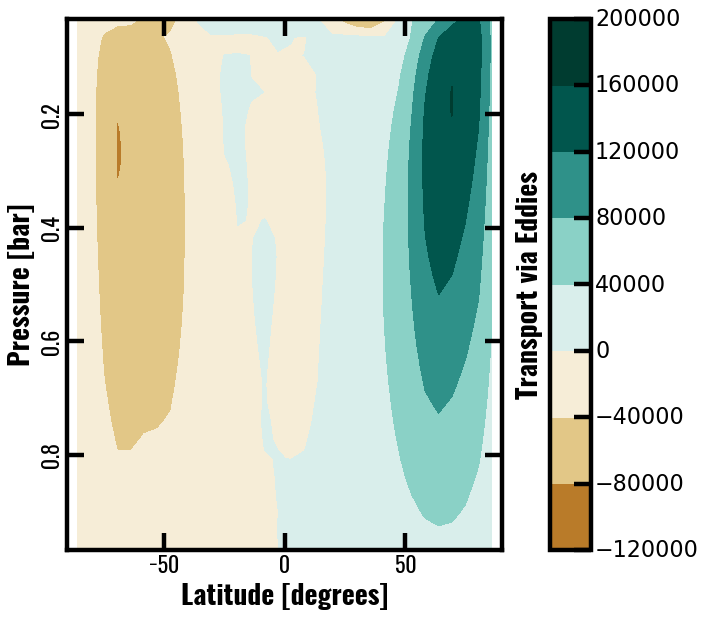

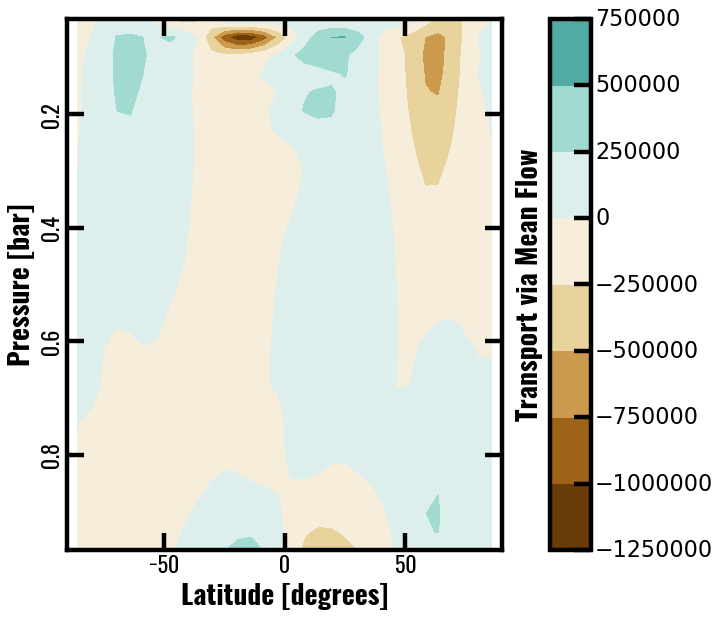

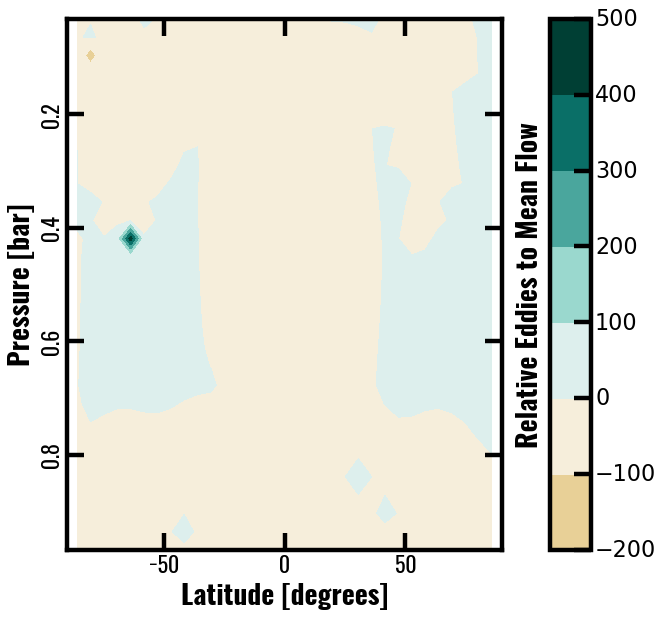

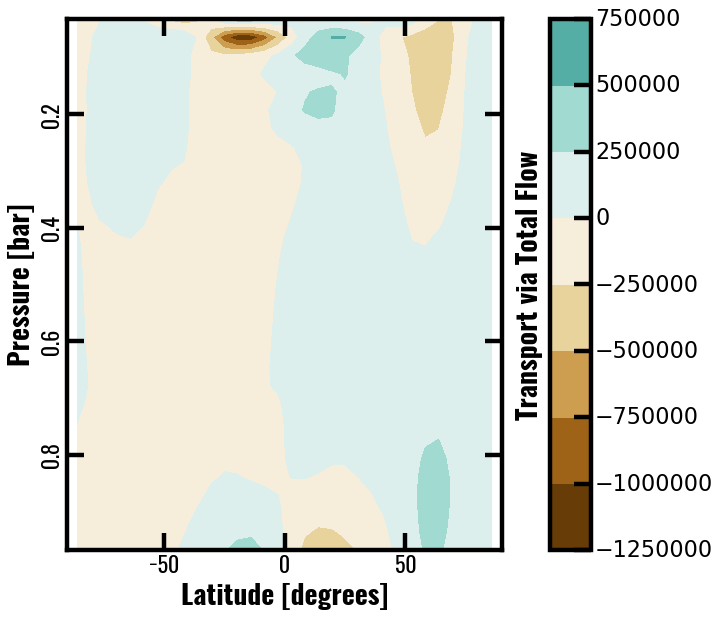

In [15]:
from load_data_noin import load_data
import numpy as np
import pickle
import matplotlib
%inline matplotlib

path='/Users/ermay/Documents/GradSchool/Research_Surface/GCM_plots/Files/'
runpath='EARTH_T21'#'FiducialPlanet_NEW/Model3/P0_050'

oom=0
p0=1.00
g=9.78#21.8 #m/s^2
R=3779. #J/kg/K
#TGR='base temp for p0' ==0???

lo=False

from altitude_func import altitude
from heat_transport_func import *
from PLOTS_pressurecontour import *
        
data_ed=viaeddies(path,runpath,lo,R,g,p0,oom)
data_mf=viameanfl(path,runpath,lo,R,g,p0,oom)

tp=path+runpath
sigma=pickle.load(open(tp+'/pres_lon_lat.txt', 'rb'))[0]
latar=pickle.load(open(tp+'/pres_lon_lat.txt', 'rb'))[2]

######################
#########################

contour_presplot(latar,sigma,data_ed,True,'Transport via Eddies',tp+'/HT_viaeddies.png')
contour_presplot(latar,sigma,data_mf,True,'Transport via Mean Flow',tp+'/HT_viameanflw.png')
contour_presplot(latar,sigma,(data_ed-data_mf)/(data_ed+data_mf),True,'Relative Eddies to Mean Flow',tp+'/HT_relative.png')
contour_presplot(latar,sigma,(data_ed+data_mf),True,'Transport via Total Flow',tp+'/HT_total.png')


pickle.dump(data_ed,open(path+runpath+'/HT_eddies.txt','wb'))
pickle.dump(data_mf,open(path+runpath+'/HT_meanfl.txt','wb'))

Text(0.8,0.8,u'T63')

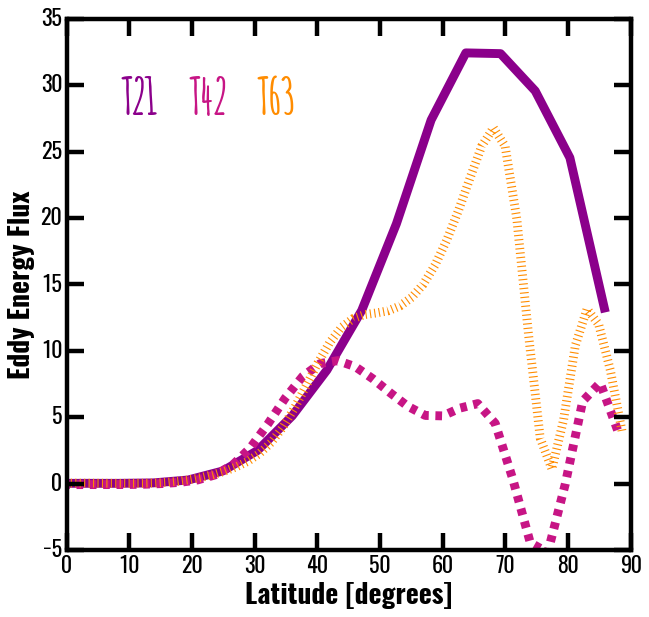

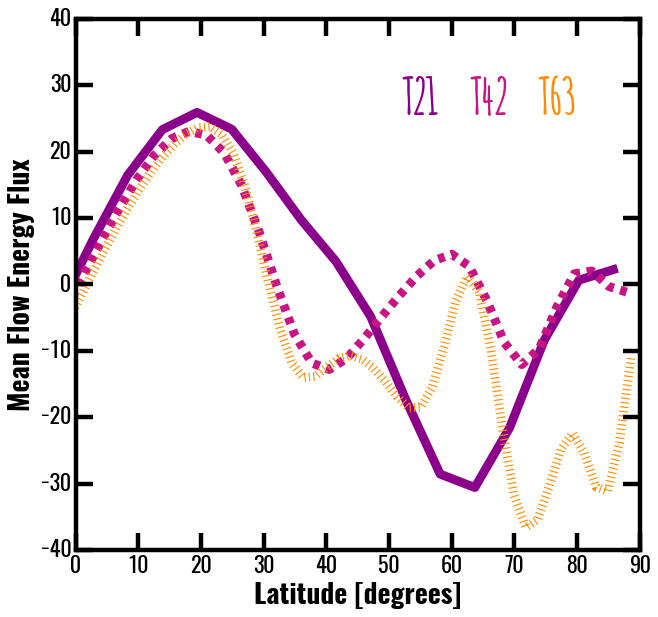

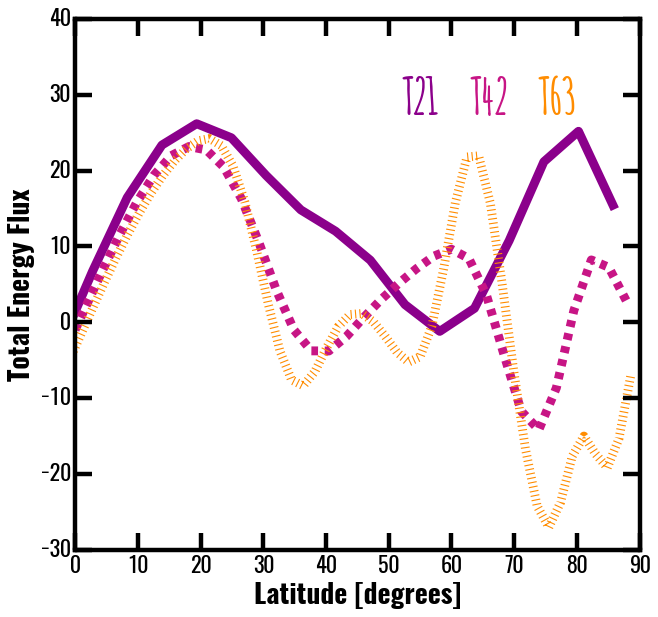

In [38]:
t21_lat=pickle.load(open(path+'EARTH_T21/pres_lon_lat.txt', 'rb'))[2]
data_ed_t21=np.nansum(pickle.load(open(path+'EARTH_T21/HT_eddies.txt', 'rb')),axis=0)
data_mf_t21=np.nansum(pickle.load(open(path+'EARTH_T21/HT_meanfl.txt', 'rb')),axis=0)

t42_lat=pickle.load(open(path+'EARTH_T42/pres_lon_lat.txt', 'rb'))[2]
data_ed_t42=np.nansum(pickle.load(open(path+'EARTH_T42/HT_eddies.txt', 'rb')),axis=0)
data_mf_t42=np.nansum(pickle.load(open(path+'EARTH_T42/HT_meanfl.txt', 'rb')),axis=0)

t63_lat=pickle.load(open(path+'EARTH_T63/pres_lon_lat.txt', 'rb'))[2]
data_ed_t63=np.nansum(pickle.load(open(path+'EARTH_T63/HT_eddies.txt', 'rb')),axis=0)
data_mf_t63=np.nansum(pickle.load(open(path+'EARTH_T63/HT_meanfl.txt', 'rb')),axis=0)

########

apath_r=os.path.join(rcParams["datapath"],'/Users/ermay/Library/Fonts/AmaticSC-Regular.ttf')
apath_b=os.path.join(rcParams["datapath"],'/Users/ermay/Library/Fonts/Amatic-Bold.ttf')
aprop_r=fm.FontProperties(fname=apath_r)
aprop_b=fm.FontProperties(fname=apath_b)

jpath_r=os.path.join(rcParams["datapath"],'/Users/ermay/Library/Fonts/JosefinSlab-Regular.ttf')
jpath_sb=os.path.join(rcParams["datapath"],'/Users/ermay/Library/Fonts/JosefinSlab-SemiBold.ttf')
jpath_b=os.path.join(rcParams["datapath"],'/Users/ermay/Library/Fonts/JosefinSlab-Bold.ttf')
jprop_r=fm.FontProperties(fname=jpath_r)
jprop_sb=fm.FontProperties(fname=jpath_sb)
jprop_b=fm.FontProperties(fname=jpath_b)

#######

fig,axes=plt.subplots(figsize=(8.5,8))
plt.gcf().subplots_adjust(bottom=0.12,top=0.95,left=0.12,right=0.95)

plt.style.use('classic')
fig.patch.set_facecolor('none')

rcParams['axes.linewidth'] = 4.0

rcParams['xtick.major.size'] = 15
rcParams['xtick.major.width'] = 4
rcParams['xtick.minor.size'] = 7
rcParams['xtick.minor.width'] = 2

rcParams['ytick.major.size'] = 15
rcParams['ytick.major.width'] = 4
rcParams['ytick.minor.size'] = 7
rcParams['ytick.minor.width'] = 2

plt.plot(t21_lat,data_ed_t21/10**5.,linewidth=8.0,linestyle='-',color='darkmagenta')
plt.plot(t42_lat,data_ed_t42/10**5.,linewidth=8.0,linestyle='--',color='mediumvioletred')
plt.plot(t63_lat,data_ed_t63/10**5.,linewidth=8.0,linestyle=':',color='darkorange')

plt.xlabel('Latitude [degrees]',
           fontsize=25,fontproperties=oprop_b)
plt.xticks(fontsize=20,fontproperties=oprop_r)
plt.xlim(0,90)

plt.ylabel('Eddy Energy Flux',fontsize=25,fontproperties=oprop_b)
plt.yticks(fontsize=20,fontproperties=oprop_r,
           rotation='horizontal')
plt.ylim(-5,35)

plt.figtext(0.2,0.8,'T21',fontsize=45,color='darkmagenta',fontproperties=aprop_b)
plt.figtext(0.3,0.8,'T42',fontsize=45,color='mediumvioletred',fontproperties=aprop_b)
plt.figtext(0.4,0.8,'T63',fontsize=45,color='darkorange',fontproperties=aprop_b)


######################

fig,axes=plt.subplots(figsize=(8.5,8))
plt.gcf().subplots_adjust(bottom=0.12,top=0.95,left=0.12,right=0.95)

plt.style.use('classic')
fig.patch.set_facecolor('none')

rcParams['axes.linewidth'] = 4.0

rcParams['xtick.major.size'] = 15
rcParams['xtick.major.width'] = 4
rcParams['xtick.minor.size'] = 7
rcParams['xtick.minor.width'] = 2

rcParams['ytick.major.size'] = 15
rcParams['ytick.major.width'] = 4
rcParams['ytick.minor.size'] = 7
rcParams['ytick.minor.width'] = 2

plt.plot(t21_lat,data_mf_t21/10**5.,linewidth=8.0,linestyle='-',color='darkmagenta')
plt.plot(t42_lat,data_mf_t42/10**5.,linewidth=8.0,linestyle='--',color='mediumvioletred')
plt.plot(t63_lat,data_mf_t63/10**5.,linewidth=8.0,linestyle=':',color='darkorange')

plt.xlabel('Latitude [degrees]',
           fontsize=25,fontproperties=oprop_b)
plt.xticks(fontsize=20,fontproperties=oprop_r)
plt.xlim(0,90)

plt.ylabel('Mean Flow Energy Flux',fontsize=25,fontproperties=oprop_b)
plt.yticks(fontsize=20,fontproperties=oprop_r,
           rotation='horizontal')
plt.ylim(-40,40)

plt.figtext(0.6,0.8,'T21',fontsize=45,color='darkmagenta',fontproperties=aprop_b)
plt.figtext(0.7,0.8,'T42',fontsize=45,color='mediumvioletred',fontproperties=aprop_b)
plt.figtext(0.8,0.8,'T63',fontsize=45,color='darkorange',fontproperties=aprop_b)
    
######################

fig,axes=plt.subplots(figsize=(8.5,8))
plt.gcf().subplots_adjust(bottom=0.12,top=0.95,left=0.12,right=0.95)

plt.style.use('classic')
fig.patch.set_facecolor('none')

rcParams['axes.linewidth'] = 4.0

rcParams['xtick.major.size'] = 15
rcParams['xtick.major.width'] = 4
rcParams['xtick.minor.size'] = 7
rcParams['xtick.minor.width'] = 2

rcParams['ytick.major.size'] = 15
rcParams['ytick.major.width'] = 4
rcParams['ytick.minor.size'] = 7
rcParams['ytick.minor.width'] = 2

plt.plot(t21_lat,(data_mf_t21+data_ed_t21)/10**5.,linewidth=8.0,linestyle='-',color='darkmagenta')
plt.plot(t42_lat,(data_mf_t42+data_ed_t42)/10**5.,linewidth=8.0,linestyle='--',color='mediumvioletred')
plt.plot(t63_lat,(data_mf_t63+data_ed_t63)/10**5.,linewidth=8.0,linestyle=':',color='darkorange')

plt.xlabel('Latitude [degrees]',
           fontsize=25,fontproperties=oprop_b)
plt.xticks(fontsize=20,fontproperties=oprop_r)
plt.xlim(0,90)

plt.ylabel('Total Energy Flux',fontsize=25,fontproperties=oprop_b)
plt.yticks(fontsize=20,fontproperties=oprop_r,
           rotation='horizontal')
plt.ylim(-30,40)

plt.figtext(0.6,0.8,'T21',fontsize=45,color='darkmagenta',fontproperties=aprop_b)
plt.figtext(0.7,0.8,'T42',fontsize=45,color='mediumvioletred',fontproperties=aprop_b)
plt.figtext(0.8,0.8,'T63',fontsize=45,color='darkorange',fontproperties=aprop_b)

    

In [29]:
1.5*6.37*10**6

9555000.0